In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import optuna

In [18]:
df_accum = pd.read_csv('data/input_df_SUMMmet_accum.csv')
df_ablat = pd.read_csv('data/input_df_SUMMmet_ablat.csv')

sites_to_drop = ['PTSH', 'SPST', 'SR01', 'SR25', 'SR11']
df_accum = df_accum[~df_accum['site.x'].isin(sites_to_drop)]
df_ablat = df_ablat[~df_ablat['site.x'].isin(sites_to_drop)]

df_ablat = df_ablat[df_ablat['delta'] > -30]
df_ablat = df_ablat[df_ablat['delta'] < 50]

df_accum = df_accum[df_accum['delta'] < 40]

df_accum = df_accum.drop(['ant1d_SNOD', 'SNOD', 'date', 'X', 'Unnamed: 0', 'site.x', 'day', 'site.y',
                          ], axis = 1)
df_ablat = df_ablat.drop(['ant1d_SNOD', 'SNOD', 'date', 'X', 'Unnamed: 0', 'site.x', 'day', 'site.y'], axis = 1)


In [19]:
X_accum = df_accum.drop('delta', axis = 1)
y_accum = df_accum['delta']

X_ablat = df_ablat.drop('delta', axis = 1)
y_ablat = df_ablat['delta']

X_accum_train, X_accum_test, y_accum_train, y_accum_test_1 = train_test_split(X_accum,
                                                                              y_accum,
                                                                              test_size=0.2, 
                                                                              random_state=4)

X_column_accum_names = X_accum.columns
y_column_accum_names = y_accum.name

X_column_ablat_names = X_ablat.columns
y_column_ablat_names = y_ablat.name

scaler_X_accum = StandardScaler()
X_accum_fit = pd.DataFrame(scaler_X_accum.fit_transform(X_accum))
X_accum_fit.columns = X_column_accum_names

y_accum_values = pd.DataFrame(y_accum).values

scaler_y_accum = StandardScaler()
y_accum_fit = pd.Series(scaler_y_accum.fit_transform(y_accum_values)[:,0])
y_accum_fit.name = y_column_accum_names

scaler_X_ablat = StandardScaler()
X_ablat_fit = pd.DataFrame(scaler_X_ablat.fit_transform(X_ablat))
X_ablat_fit.columns = X_column_ablat_names

y_ablat_values = pd.DataFrame(y_ablat).values

scaler_y_ablat = StandardScaler()
y_ablat_fit = pd.Series(scaler_y_ablat.fit_transform(y_ablat_values)[:,0])
y_ablat_fit.name = y_column_ablat_names

In [20]:
X_accum_fit_train, X_accum_fit_test, y_accum_fit_train, y_accum_fit_test = train_test_split(X_accum_fit,
                                                                                            y_accum_fit,
                                                                                            test_size=0.2, 
                                                                                            random_state=11)
X_ablat_fit_train, X_ablat_fit_test, y_ablat_fit_train, y_ablat_fit_test = train_test_split(X_ablat_fit, 
                                                                                            y_ablat_fit, 
                                                                                            test_size=0.2, 
                                                                                            random_state=11)

In [23]:
accum_backprop = MLPRegressor(hidden_layer_sizes = [200, 200, 25],
                              activation = 'logistic',
                              learning_rate_init = 0.0015600775456701874,
                              alpha = 3.126717787854824e-05,
                              max_iter = 2000,
                              shuffle = False,
                              random_state = 42,
                              tol = 6.441541630133853e-06,
                              n_iter_no_change=10,
                              verbose = True,
                              learning_rate='adaptive',
                              solver = 'adam')

accum_backprop.fit(X_accum_fit_train, y_accum_fit_train)
preds_accum = accum_backprop.predict(X_accum_fit_test)

preds_accum = scaler_y_accum.inverse_transform(preds_accum.reshape(-1,1))
y_accum_test_2 = scaler_y_accum.inverse_transform(np.array(y_accum_fit_test).reshape(-1,1))

rmse_accum = metrics.root_mean_squared_error(y_accum_test_2, preds_accum)
r2_accum = metrics.r2_score(y_accum_test_2, preds_accum)



Iteration 1, loss = 0.49621799
Iteration 2, loss = 0.48785426
Iteration 3, loss = 0.48239105
Iteration 4, loss = 0.48143730
Iteration 5, loss = 0.47858379
Iteration 6, loss = 0.47417194
Iteration 7, loss = 0.47035132
Iteration 8, loss = 0.46590435
Iteration 9, loss = 0.46006964
Iteration 10, loss = 0.45538567
Iteration 11, loss = 0.45052894
Iteration 12, loss = 0.44472240
Iteration 13, loss = 0.43875320
Iteration 14, loss = 0.43165117
Iteration 15, loss = 0.42472422
Iteration 16, loss = 0.41791425
Iteration 17, loss = 0.41227536
Iteration 18, loss = 0.40790312
Iteration 19, loss = 0.40442380
Iteration 20, loss = 0.40115311
Iteration 21, loss = 0.39809015
Iteration 22, loss = 0.39508408
Iteration 23, loss = 0.39233645
Iteration 24, loss = 0.38975518
Iteration 25, loss = 0.38737580
Iteration 26, loss = 0.38510691
Iteration 27, loss = 0.38294281
Iteration 28, loss = 0.38083741
Iteration 29, loss = 0.37876405
Iteration 30, loss = 0.37671493
Iteration 31, loss = 0.37466664
Iteration 32, los

rmse =  3.9564648019392052
r2 =  0.687952543784719


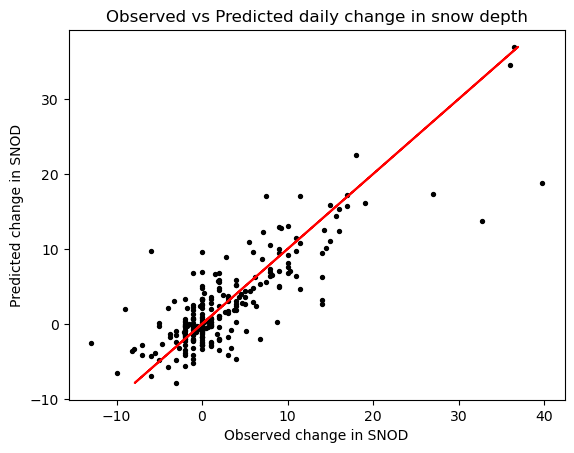

In [24]:
plt.scatter(y_accum_test_2, preds_accum, s = 8, c = "black")
plt.plot(preds_accum, preds_accum, c = "red")
plt.xlabel("Observed change in SNOD")
plt.ylabel("Predicted change in SNOD")
plt.title("Observed vs Predicted daily change in snow depth")
print("rmse = ", rmse_accum) 
print("r2 = ", r2_accum)

rmse =  2.1959962489976146
r2 =  0.8881580832196141


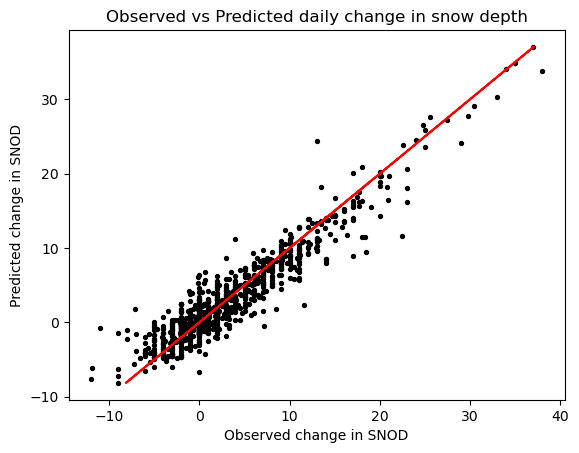

In [10]:
preds_accum_train = accum_backprop.predict(X_accum_fit_train)

preds_accum_train = scaler_y_accum.inverse_transform(preds_accum_train.reshape(-1,1))
y_accum_train_1 = scaler_y_accum.inverse_transform(np.array(y_accum_fit_train).reshape(-1,1))

rmse_accum_train = metrics.root_mean_squared_error(y_accum_train_1, preds_accum_train)
r2_accum_train = metrics.r2_score(y_accum_train_1, preds_accum_train)

plt.scatter(y_accum_train_1, preds_accum_train, s = 8, c = "black")
plt.plot(preds_accum_train, preds_accum_train, c = "red")
plt.xlabel("Observed change in SNOD")
plt.ylabel("Predicted change in SNOD")
plt.title("Observed vs Predicted daily change in snow depth")
print("rmse = ", rmse_accum_train) 
print("r2 = ", r2_accum_train)

In [5]:
def objective(trial):
        # Suggest hyperparameters for MLP
    hidden_layer_sizes = trial.suggest_categorical('hidden_layer_sizes', [(200,200,50), (200,200,25)])
    alpha = trial.suggest_float('alpha', 1e-6, 1e-4, log = True)
    learning_rate_init = trial.suggest_float('learning_rate_init', 1e-4, 1e-2, log = True)
    tolerance = trial.suggest_float('tolerance', 1e-8, 1e-2, log = True)
    n_iter_no_change = trial.suggest_int('n_iter_no_change', 10, 200)

    # Create MLP model with suggested hyperparameters
    model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes,
                          activation='logistic',
                          solver='adam',
                          alpha=alpha,
                          learning_rate_init=learning_rate_init,
                          max_iter=2000, # Set a reasonable max_iter
                          random_state=42)

    # Train the model
    model.fit(X_accum_fit_train, y_accum_fit_train)

    # Evaluate the model
    preds_accum = model.predict(X_accum_fit_test)
    preds_accum = scaler_y_accum.inverse_transform(preds_accum.reshape(-1,1))
    y_accum_test_2 = scaler_y_accum.inverse_transform(np.array(y_accum_fit_test).reshape(-1,1))

    return metrics.root_mean_squared_error(y_accum_test_2, preds_accum) 

study = optuna.create_study(direction='minimize') # 'minimize' for error, 'maximize' for accuracy/score
study.optimize(objective, n_trials=100) # Run 50 trials

print(f"Best trial: {study.best_trial.value}")
print(f"Best hyperparameters: {study.best_params}")


[I 2025-11-14 16:22:10,887] A new study created in memory with name: no-name-73708a09-205e-4ae4-b64c-d1a60124fcb6
c:\Users\jrladue\AppData\Local\anaconda3\Lib\site-packages\optuna\distributions.py:518: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (200, 200, 50) which is of type tuple.
  warnings.warn(message)
c:\Users\jrladue\AppData\Local\anaconda3\Lib\site-packages\optuna\distributions.py:518: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (200, 200, 25) which is of type tuple.
  warnings.warn(message)
[I 2025-11-14 16:22:16,891] Trial 0 finished with value: 4.22043848556542 and parameters: {'hidden_layer_sizes': (200, 200, 50), 'alpha': 1.3182113758678151e-06, 'learning_rate_init': 0.004557952456580662, 'tolerance': 1.362484393872031e-07, 'n_iter_no_change': 156}. Best is trial 0 with value: 4.2204

Best trial: 3.8881900914060865
Best hyperparameters: {'hidden_layer_sizes': (200, 200, 25), 'alpha': 3.126717787854824e-05, 'learning_rate_init': 0.0015600775456701874, 'tolerance': 6.441541630133853e-06, 'n_iter_no_change': 73}


In [18]:
optuna.visualization.plot_optimization_history(study)

In [7]:
df = study.trials_dataframe()